# TARUN SUNKARANENI'S Point-Clustering Notebook: K-means++ Algorithm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['figure.dpi'] = 200
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['C3.csv', 'C2.csv', 'C1.csv']


In [2]:
c2 = pd.read_csv("../input/C2.csv", names=['x0', 'x1'])

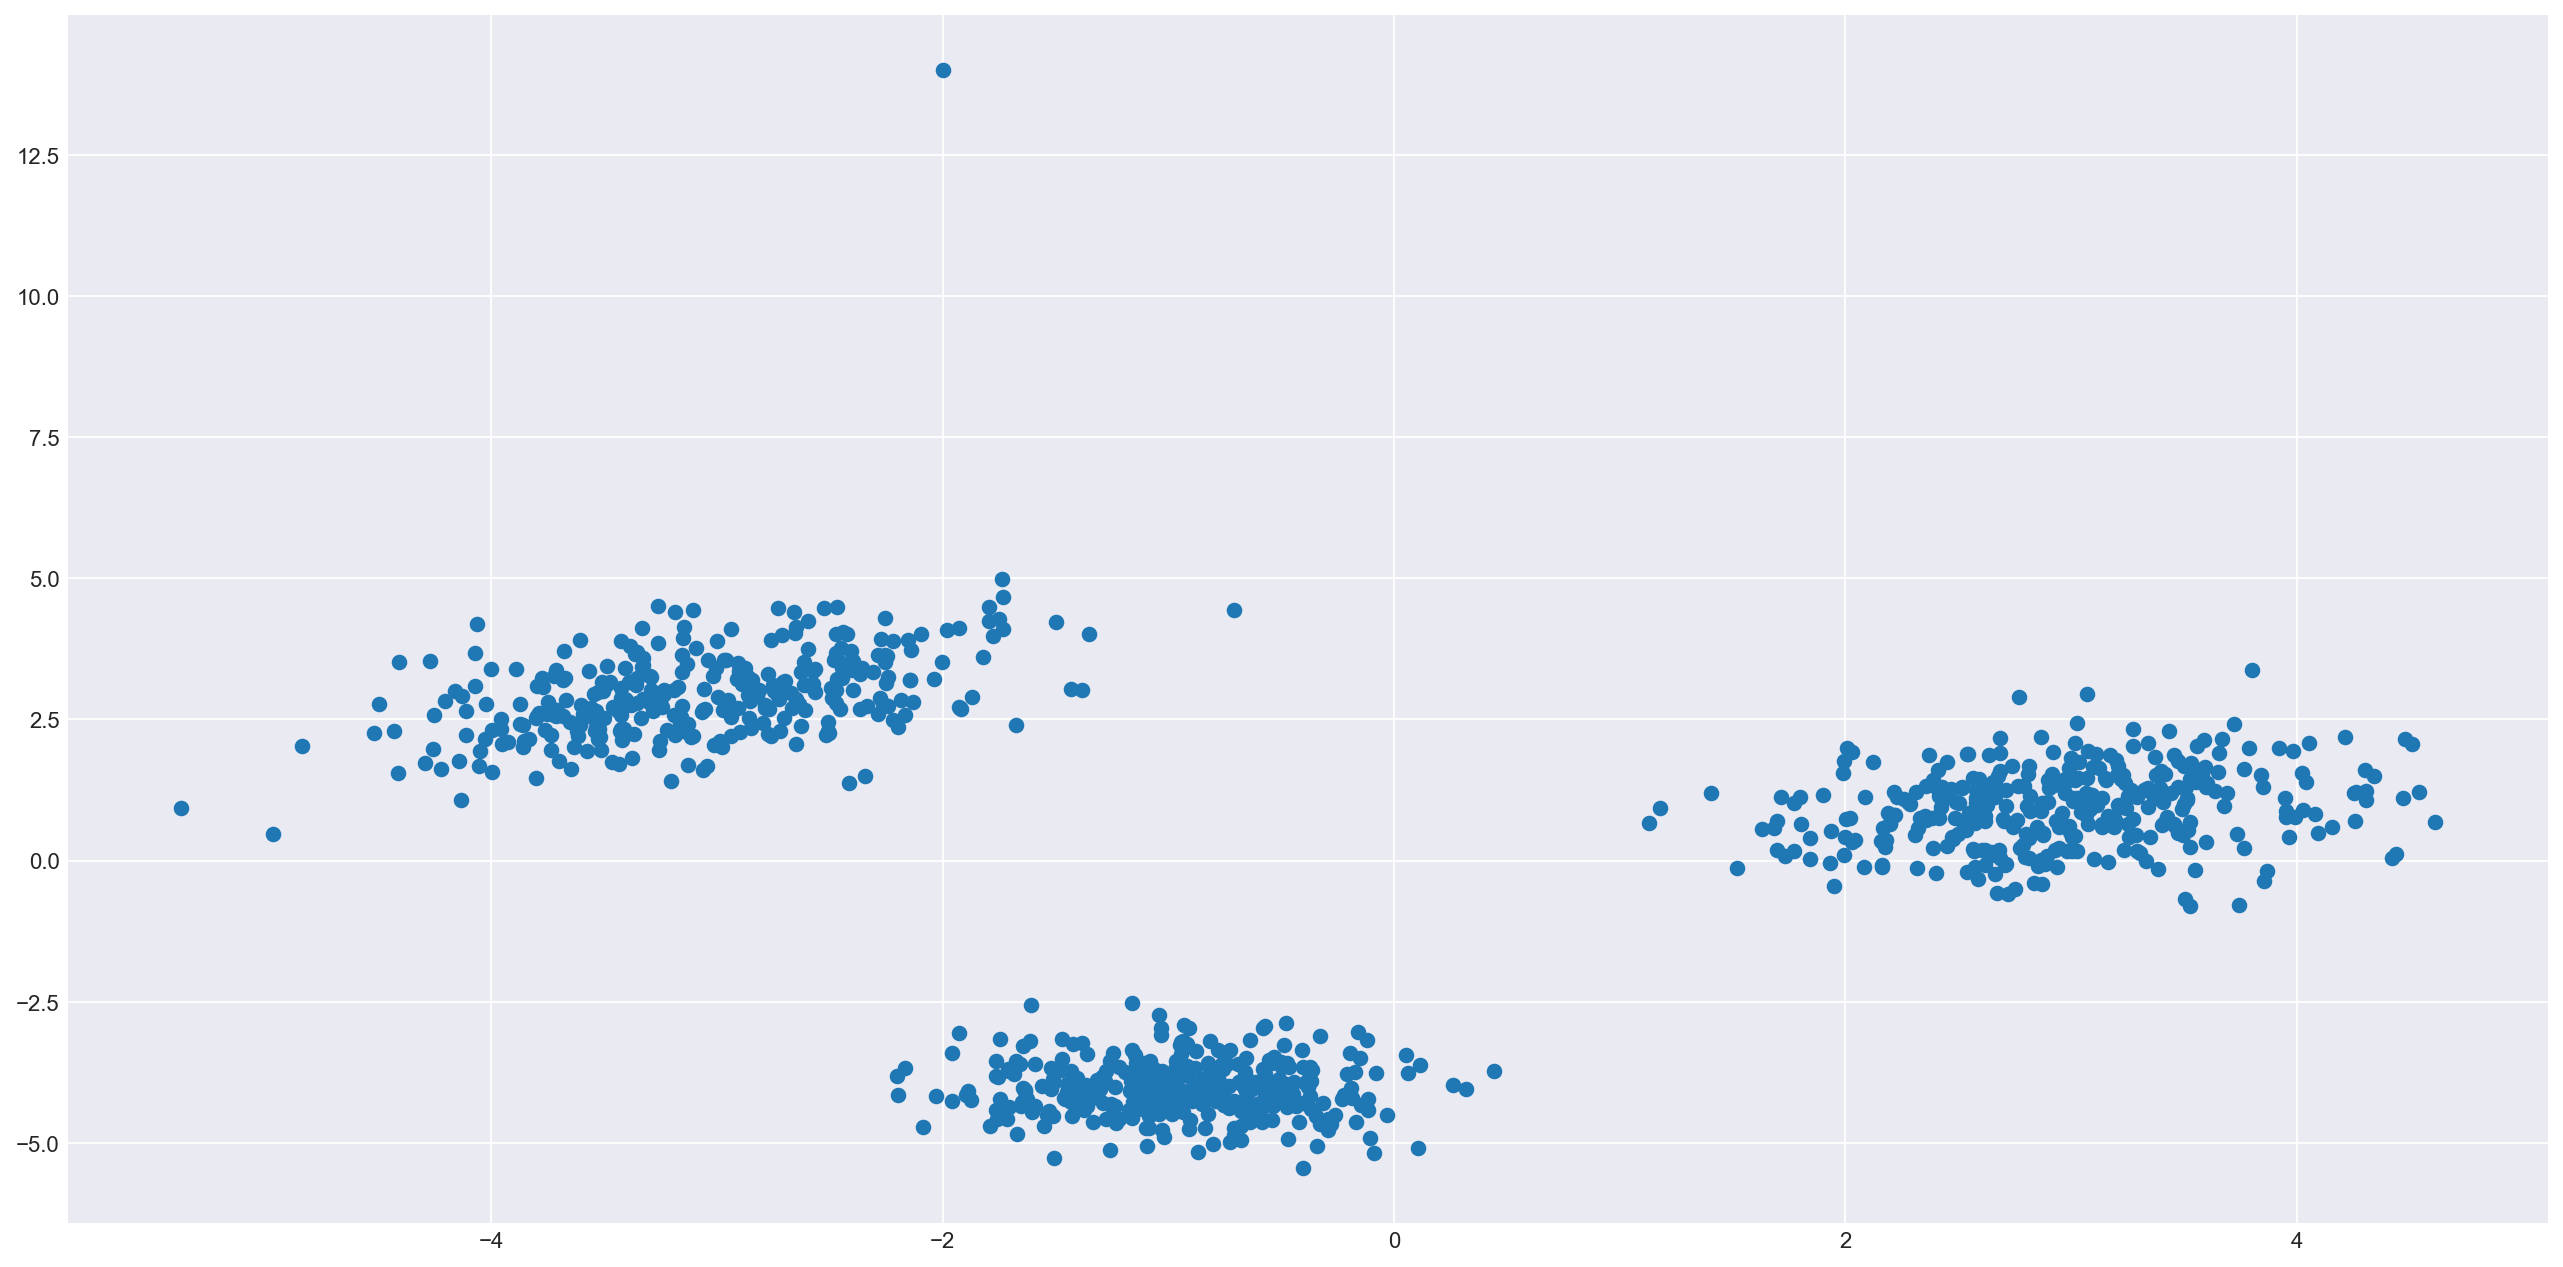

In [4]:
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])

In [5]:
data_set = []
for index, row in c2.iterrows():
        data_set.append([row['x0'], row['x1']]) 
data_set = np.array(data_set)
        # prelim work to get every point into a list of coordinates

In [6]:
def init_kmeans_plus_plus(points, K, c_init = None):
    assert K>=2, "So you want to make 1 cluster?"
    # get the first centroid
    if c_init is None:
        centroids = [points[0]]
    # choice next
    for k in range (0, K-1):
        
        prob_distribution = []
        for point in points:
            proba = distance.euclidean(point,centroids[k-1])**2 # compare to last center point
            prob_distribution.append(proba)
            #normalize these values at the end so that we can now use the array as a probability distribution function
        prob_distribution = np.array(prob_distribution)/np.sum(prob_distribution)  
        #Now we will get one of these values and add it to our clusters
        centroids.append(points[np.random.choice(range(points.shape[0]), p=prob_distribution)])      
    return np.array(centroids)

In [15]:
cluster_points = init_kmeans_plus_plus(data_set, 3)

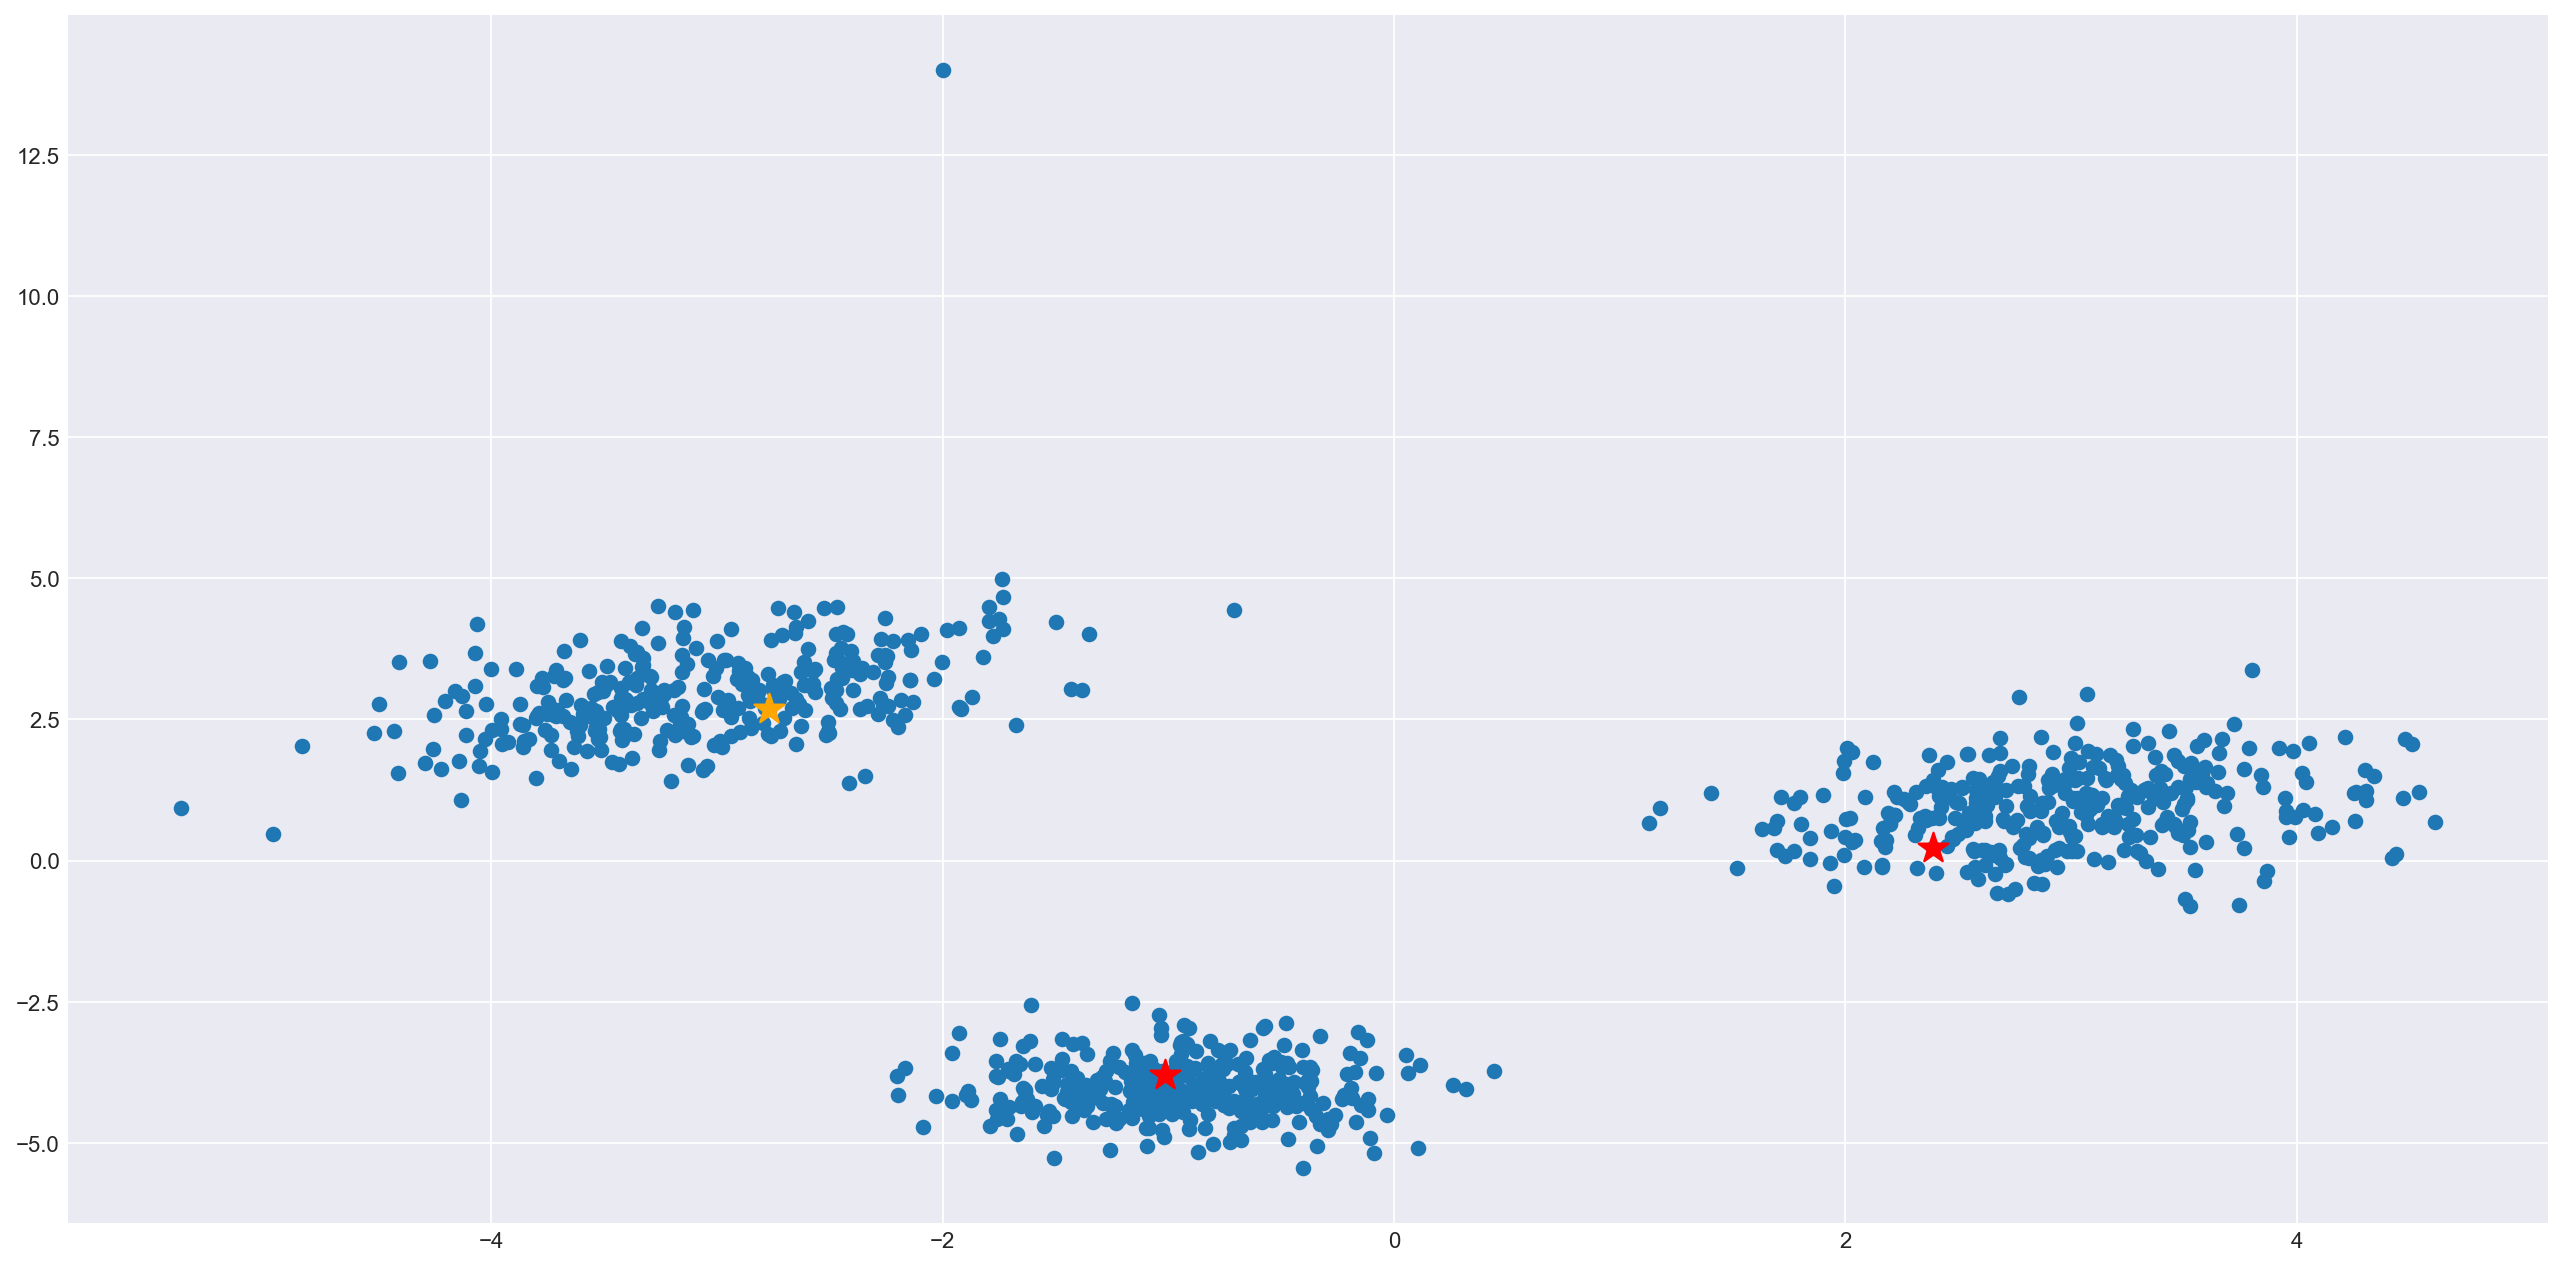

In [16]:
plt.figure(figsize=(20,10), dpi=160)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        plt.scatter(point[0],point[1], marker='*', c='red', s=200)
    if index is 0: # this is our ifrst point, which was picked staticly
        plt.scatter(point[0],point[1], marker='*', c='orange', s=200)

In [17]:
trials = 1000
cost = np.zeros(trials)
for _ in range(trials):
    cluster_points = init_kmeans_plus_plus(data_set, 3)
    cluster_distance = np.full(len(data_set), np.inf)
    for point_idx, point in enumerate(data_set):
        for cluster_idx, cluster_point in enumerate(cluster_points):
            if cluster_distance[point_idx] is math.inf:
                cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
                continue
            if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
                cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
    cost[_] = (math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set)))
#print('3-means costs for  trials= ', trials,' is cost= ', cost)

In [18]:
y = []
i=0
totalFrac = 1/trials
cost = sorted(cost)
for z in range(len(cost)):
    y.append(cost.index(cost[z])*totalFrac)
    if math.fabs(cost[z] - 3.699) < 0.1:
        i = i +1
print('Close 3-means compared to Gonzalez:',i)

Close 3-means compared to Gonzalez: 57


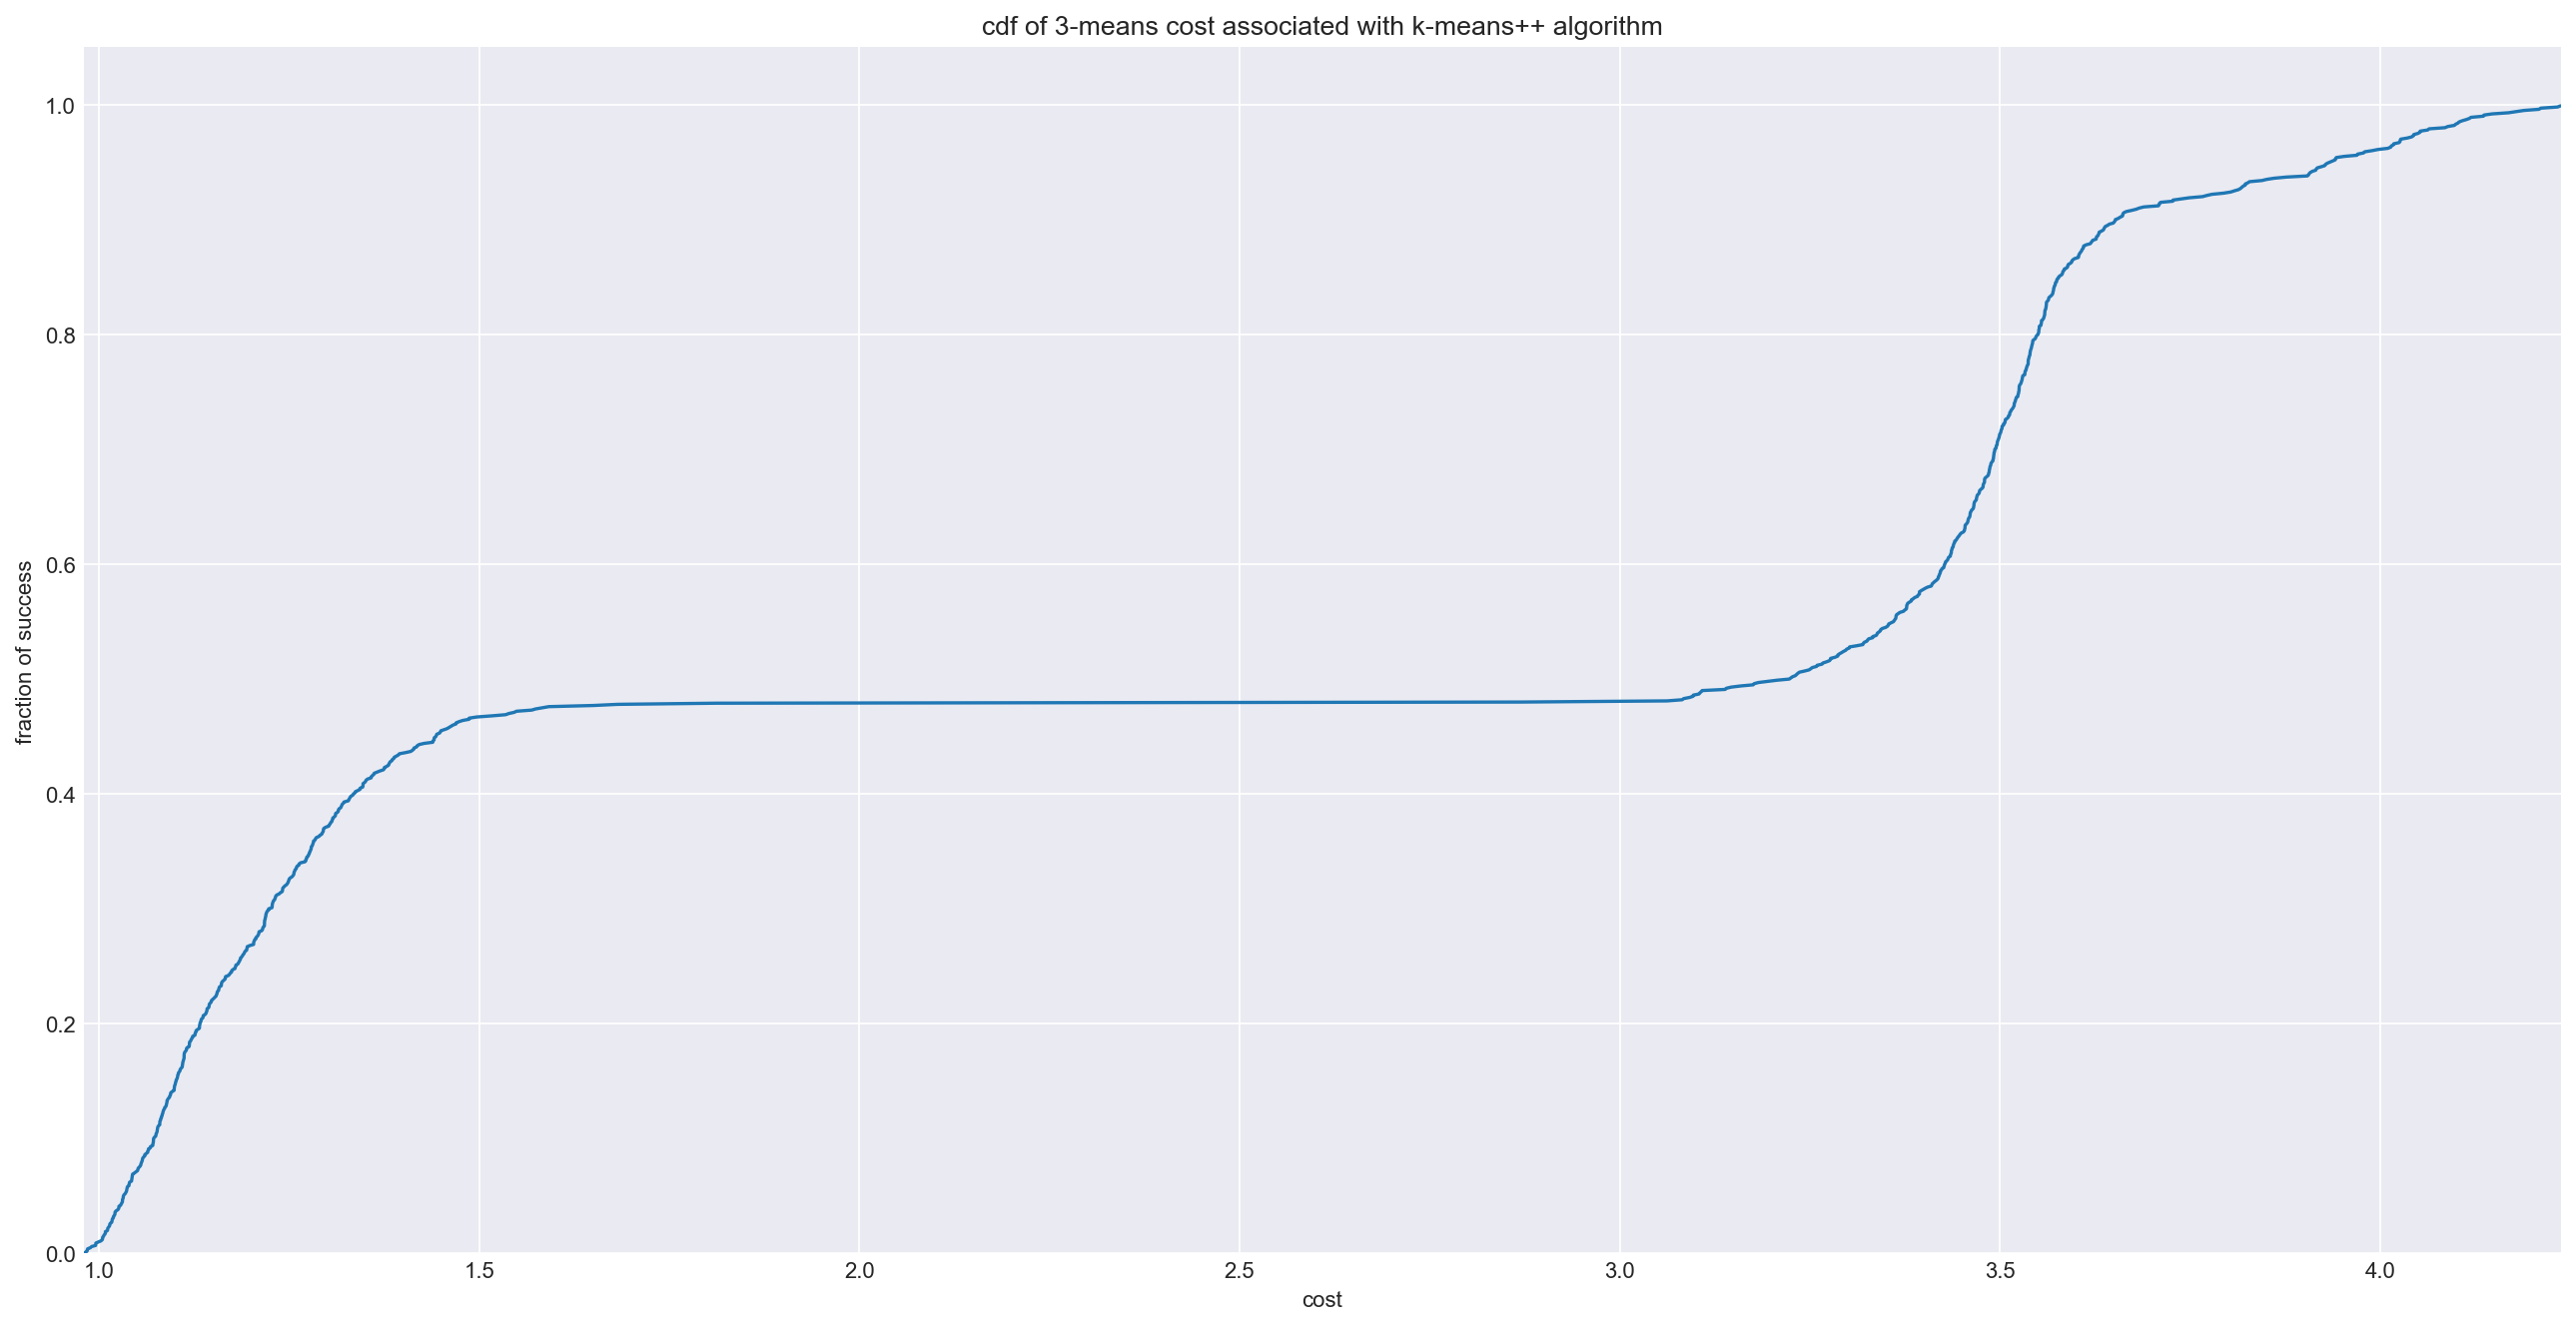

In [20]:
plt.figure(figsize=(20,10), dpi=160)
plt.title("cdf of 3-means cost associated with k-means++ algorithm")
plt.xlabel("cost")
plt.ylabel("fraction of success")
plt.xlim([np.min(cost),np.max(cost)])
plt.ylim([0.00,1.05])
plt.plot(np.array(cost), np.array(y))
plt.show()

Breakdown of the CDF: there's approximately only two kinds of outputs the CDF will produce. And they are plotted below. The centeroids on the left plot is falls in the first rapid growth stage of the CDF (`cost: 1 - 1.5`), followed by the second rapid growth stage of the CDF (`cost:3.3 - 4.3`) involves the plot on the right. As K-means++ only picks centeroids amongst points in the dataset, there's really no way to get that `cost:1.5 - 3.1` range.

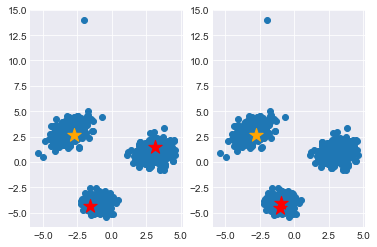

In [34]:
from matplotlib import pyplot
pyplot.figure()

# sp1
cluster_points = init_kmeans_plus_plus(data_set, 3)
pyplot.subplot(121)
pyplot.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        pyplot.scatter(point[0],point[1], marker='*', c='red', s=200)
    if index is 0: # this is our ifrst point, which was picked staticly
        pyplot.scatter(point[0],point[1], marker='*', c='orange', s=200)

# sp2
cluster_points = init_kmeans_plus_plus(data_set, 3)
pyplot.subplot(122)
pyplot.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    if index is not 0: # these points are generated
        pyplot.scatter(point[0],point[1], marker='*', c='red', s=200)
    if index is 0: # this is our ifrst point, which was picked staticly
        pyplot.scatter(point[0],point[1], marker='*', c='orange', s=200)

pyplot.show()